In [27]:
import pandas as pd

In [28]:
# Try a different encoding, for example 'latin-1'
train_df = pd.read_csv('train.csv', encoding='latin-1')
test_df = pd.read_csv('test.csv', encoding='latin-1')

In [29]:
# Display the first few rows of the training dataset
print(train_df.head())

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0    

In [30]:
# Check the structure and summary statistics
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None
       Population -2020  Land Area (Km²)  Density (P/Km²)
count      2.748100e+04     2.748100e+04     27481.000000
mean       4.018497e+07     6.621730e+05       357.686583
std        1.504946e+08     1.807425e+06      2013.750702
min        8.010000e+02     

In [31]:
# Check for missing values
print(train_df.isnull().sum())

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [33]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [36]:
# Preprocessing function
def preprocess_text(text):
    # Handle potential non-string values
    if not isinstance(text, str):
        text = str(text)  # Convert to string if not already

    # Lowercase the text
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Remove stop words
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the text columns
train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

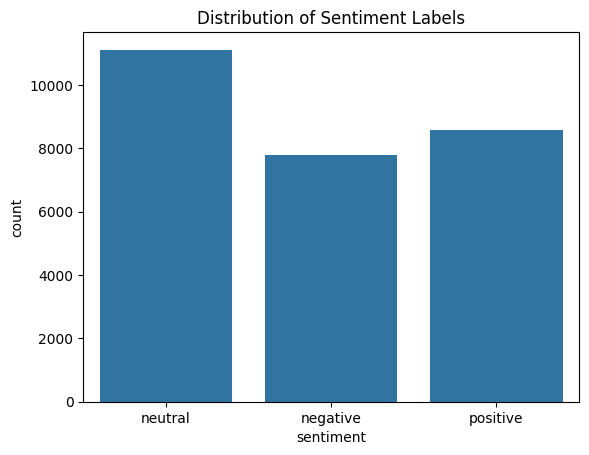

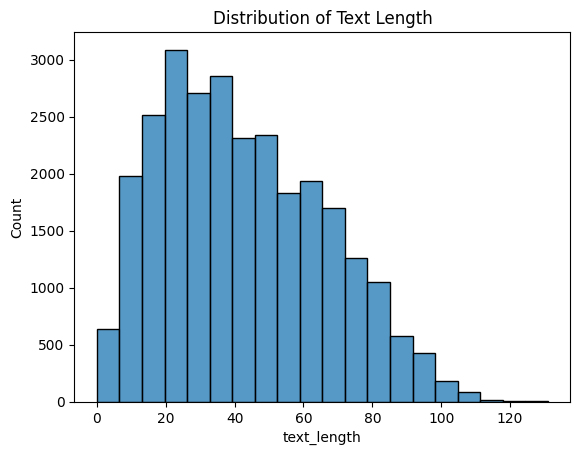

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sentiment labels
sns.countplot(x='sentiment', data=train_df)
plt.title('Distribution of Sentiment Labels')
plt.show()

# Visualization of text length distribution
train_df['text_length'] = train_df['clean_text'].apply(len)
sns.histplot(train_df['text_length'], bins=20)
plt.title('Distribution of Text Length')
plt.show()


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['clean_text'])

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(test_df['clean_text'])

# Sentiment labels as target variable
y_train = train_df['sentiment']


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)
print("Naive Bayes Classification Report:\n", classification_report(y_val, y_pred_nb))

# Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
print("SVM Classification Report:\n", classification_report(y_val, y_pred_svm))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.51      0.60      1562
     neutral       0.56      0.76      0.65      2230
    positive       0.73      0.60      0.66      1705

    accuracy                           0.64      5497
   macro avg       0.67      0.62      0.63      5497
weighted avg       0.66      0.64      0.64      5497

SVM Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.60      0.67      1562
     neutral       0.64      0.77      0.70      2230
    positive       0.78      0.71      0.74      1705

    accuracy                           0.71      5497
   macro avg       0.73      0.70      0.71      5497
weighted avg       0.72      0.71      0.71      5497

